# **AI TECH INSTITUTE** · *Intermediate AI & Data Science*
### Week 02 · Notebook 02 — Statistical Visualization & EDA Patterns
**Instructor:** Amir Charkhi  |  **Goal:** Master statistical visualizations for comprehensive EDA.

> Format: distribution analysis → correlation patterns → time series → multivariate exploration.


---
## From Numbers to Insights
Statistical visualization transforms raw data into actionable insights. Let's master the techniques.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import gaussian_kde
import warnings
warnings.filterwarnings('ignore')

# Configure
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('muted')
pd.set_option('display.precision', 2)

print("Statistical visualization toolkit loaded! 📈")

Statistical visualization toolkit loaded! 📈


## 1. Load Retail Analytics Dataset

In [2]:
# Generate comprehensive retail dataset
np.random.seed(42)
n_transactions = 10000
n_customers = 2000
n_products = 500

# Generate transaction data
dates = pd.date_range(end='2024-12-31', periods=n_transactions)
retail_data = pd.DataFrame({
    'transaction_id': range(n_transactions),
    'date': dates,
    'customer_id': np.random.choice(range(n_customers), n_transactions),
    'product_id': np.random.choice(range(n_products), n_transactions),
    'category': np.random.choice(['Electronics', 'Clothing', 'Food', 'Home', 'Sports', 'Books'], 
                                n_transactions, p=[0.25, 0.20, 0.20, 0.15, 0.10, 0.10]),
    'quantity': np.random.poisson(2, n_transactions) + 1,
    'unit_price': np.random.lognormal(3, 1, n_transactions),
    'payment_method': np.random.choice(['Credit', 'Debit', 'Cash', 'Digital'], 
                                      n_transactions, p=[0.4, 0.3, 0.2, 0.1]),
    'store_location': np.random.choice(['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide'], 
                                      n_transactions, p=[0.3, 0.25, 0.20, 0.15, 0.10]),
    'customer_age': np.random.normal(40, 15, n_transactions).clip(18, 80).astype(int),
    'customer_gender': np.random.choice(['M', 'F', 'Other'], n_transactions, p=[0.48, 0.50, 0.02]),
    'is_member': np.random.choice([True, False], n_transactions, p=[0.3, 0.7]),
    'satisfaction_score': np.random.choice([1, 2, 3, 4, 5], n_transactions, 
                                         p=[0.05, 0.10, 0.20, 0.35, 0.30])
})

# Calculate derived fields
retail_data['total_amount'] = retail_data['quantity'] * retail_data['unit_price']
retail_data['hour'] = retail_data['date'].dt.hour
retail_data['day_of_week'] = retail_data['date'].dt.day_name()
retail_data['month'] = retail_data['date'].dt.month
retail_data['is_weekend'] = retail_data['date'].dt.dayofweek.isin([5, 6])

# Add customer segments based on age
retail_data['age_group'] = pd.cut(retail_data['customer_age'], 
                                  bins=[0, 25, 35, 50, 65, 100],
                                  labels=['Gen Z', 'Millennial', 'Gen X', 'Boomer', 'Senior'])

print(f"Dataset shape: {retail_data.shape}")
print(f"Date range: {retail_data['date'].min()} to {retail_data['date'].max()}")
print("\nSample data:")
retail_data.head()

Dataset shape: (10000, 19)
Date range: 1997-08-16 00:00:00 to 2024-12-31 00:00:00

Sample data:


,transaction_id,date,customer_id,product_id,category,quantity,unit_price,payment_method,store_location,customer_age,customer_gender,is_member,satisfaction_score,total_amount,hour,day_of_week,month,is_weekend,age_group
0,0,1997-08-16,1126,228,Clothing,2,20.60,Debit,Sydney,47,M,False,4,41.20,0,Saturday,8,True,Gen X
1,1,1997-08-17,1459,349,Clothing,4,5.82,Debit,Adelaide,34,M,False,5,23.27,0,Sunday,8,True,Millennial
2,2,1997-08-18,860,274,Clothing,4,35.72,Credit,Sydney,43,M,True,5,142.89,0,Monday,8,False,Gen X
3,3,1997-08-19,1294,441,Food,3,85.27,Cash,Perth,51,F,False,4,255.81,0,Tuesday,8,False,Boomer
4,4,1997-08-20,1130,278,Food,2,99.68,Digital,Perth,36,M,False,5,199.35,0,Wednesday,8,False,Gen X


## 2. Distribution Analysis - Multiple Approaches

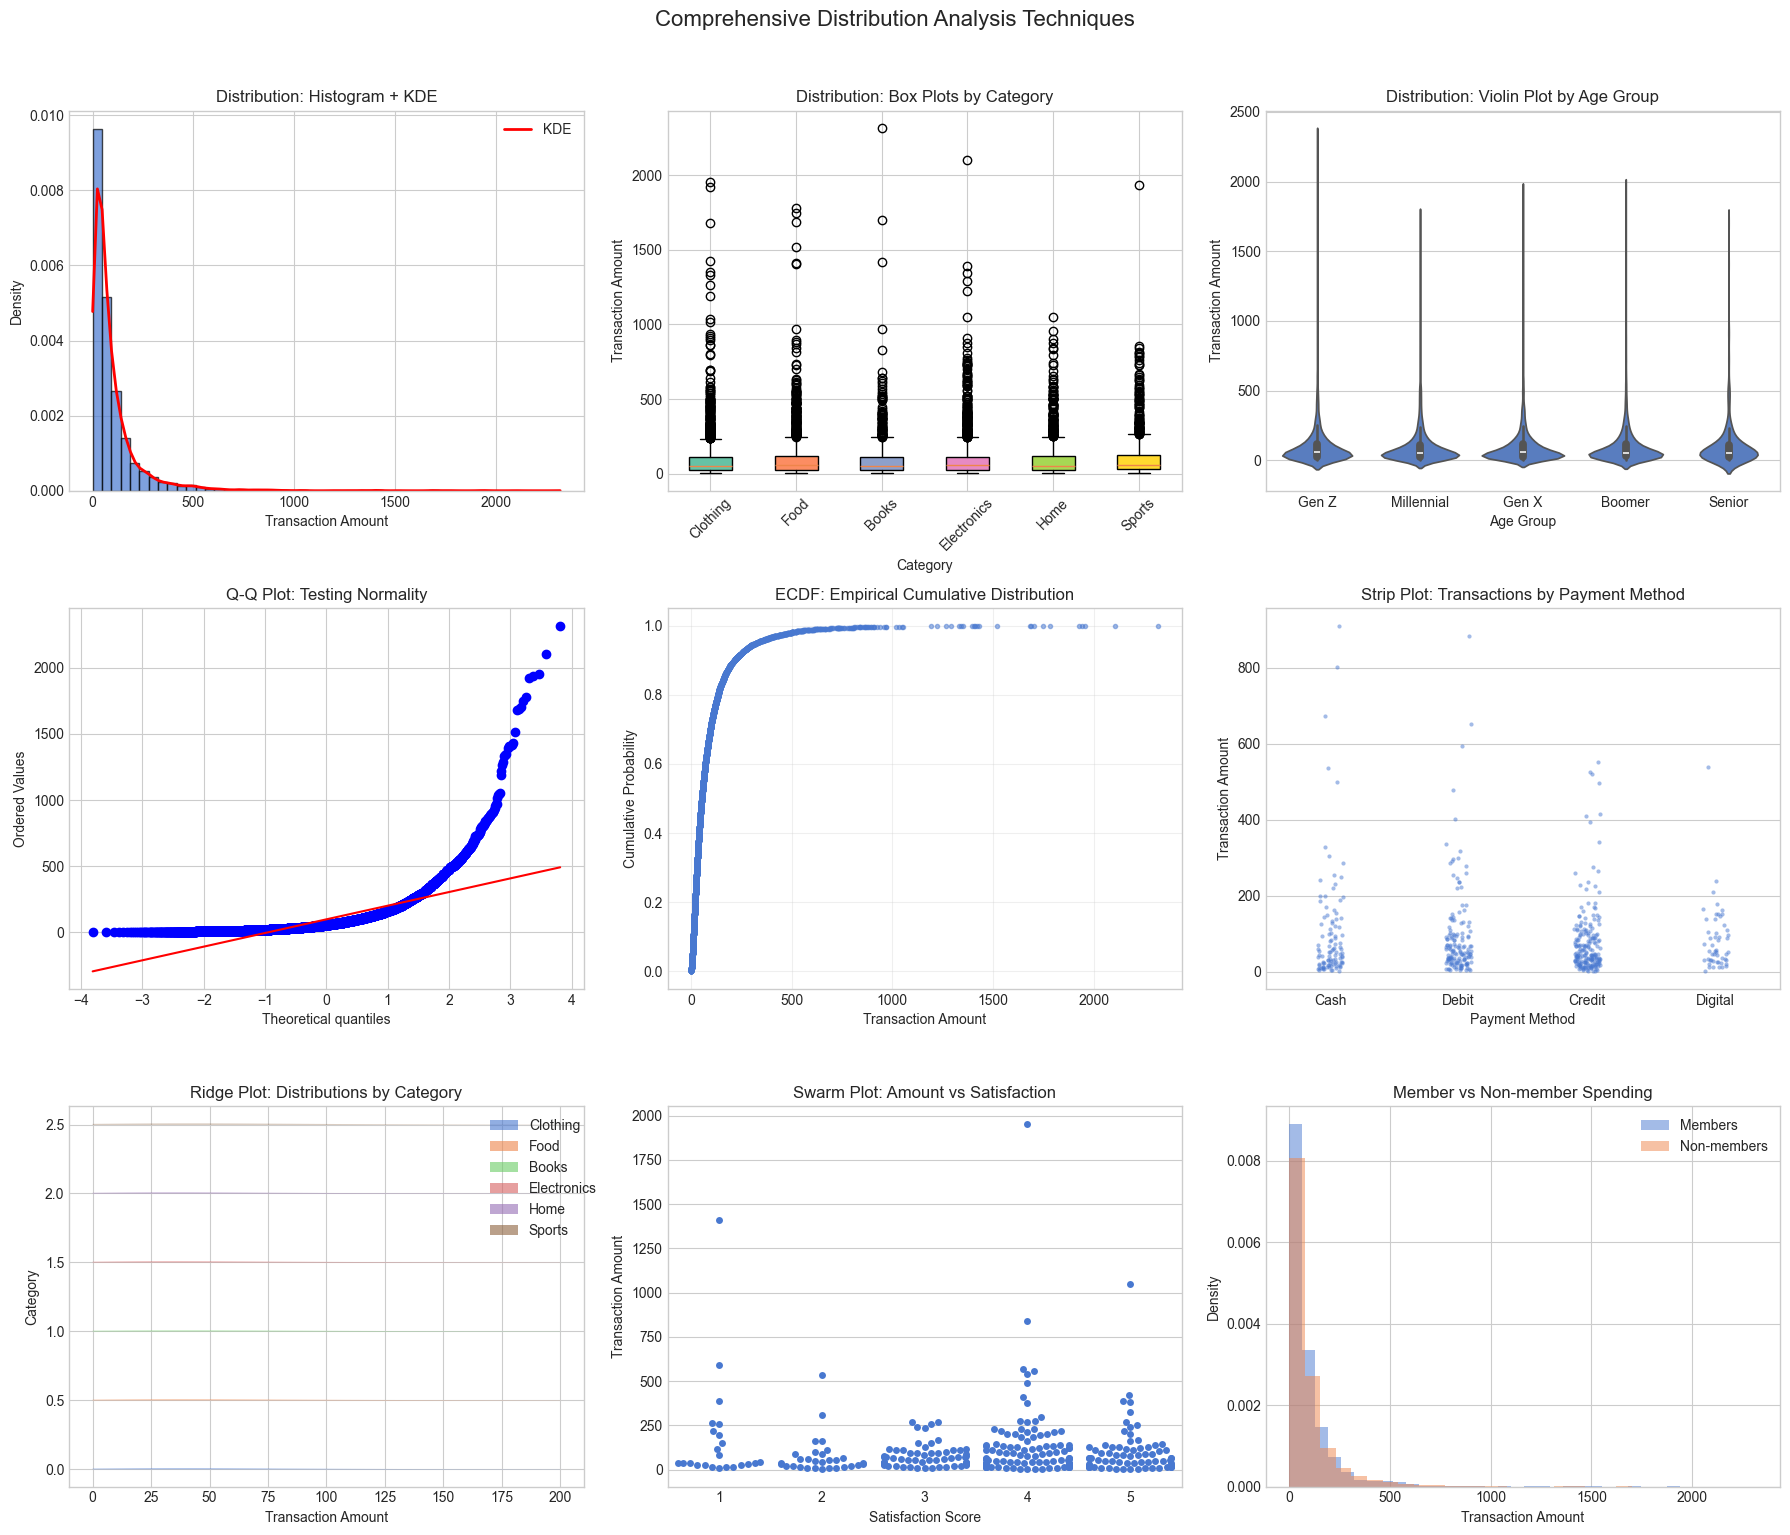


Statistical Summary:
Mean transaction: $96.77
Median transaction: $54.91
Std deviation: $136.59
Skewness: 5.18
Kurtosis: 46.24


In [3]:
# Comprehensive distribution analysis
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# 1. Histogram with KDE overlay
ax1 = axes[0, 0]
ax1.hist(retail_data['total_amount'], bins=50, density=True, alpha=0.7, edgecolor='black')
kde = gaussian_kde(retail_data['total_amount'])
x_range = np.linspace(retail_data['total_amount'].min(), retail_data['total_amount'].max(), 100)
ax1.plot(x_range, kde(x_range), 'r-', linewidth=2, label='KDE')
ax1.set_title('Distribution: Histogram + KDE')
ax1.set_xlabel('Transaction Amount')
ax1.set_ylabel('Density')
ax1.legend()

# 2. Box plot with outliers
ax2 = axes[0, 1]
box_data = [retail_data[retail_data['category']==cat]['total_amount'].values 
            for cat in retail_data['category'].unique()]
bp = ax2.boxplot(box_data, labels=retail_data['category'].unique(), patch_artist=True)
for patch, color in zip(bp['boxes'], sns.color_palette('Set2', 6)):
    patch.set_facecolor(color)
ax2.set_title('Distribution: Box Plots by Category')
ax2.set_xlabel('Category')
ax2.set_ylabel('Transaction Amount')
ax2.tick_params(axis='x', rotation=45)

# 3. Violin plot
ax3 = axes[0, 2]
sns.violinplot(data=retail_data, x='age_group', y='total_amount', ax=ax3)
ax3.set_title('Distribution: Violin Plot by Age Group')
ax3.set_xlabel('Age Group')
ax3.set_ylabel('Transaction Amount')

# 4. Q-Q plot for normality
ax4 = axes[1, 0]
stats.probplot(retail_data['total_amount'], dist="norm", plot=ax4)
ax4.set_title('Q-Q Plot: Testing Normality')

# 5. ECDF (Empirical Cumulative Distribution)
ax5 = axes[1, 1]
sorted_amount = np.sort(retail_data['total_amount'])
ecdf = np.arange(1, len(sorted_amount) + 1) / len(sorted_amount)
ax5.plot(sorted_amount, ecdf, marker='.', linestyle='none', alpha=0.5)
ax5.set_title('ECDF: Empirical Cumulative Distribution')
ax5.set_xlabel('Transaction Amount')
ax5.set_ylabel('Cumulative Probability')
ax5.grid(True, alpha=0.3)

# 6. Strip plot with jitter
ax6 = axes[1, 2]
sample_data = retail_data.sample(500)  # Sample for visibility
sns.stripplot(data=sample_data, x='payment_method', y='total_amount', 
             alpha=0.5, size=3, ax=ax6)
ax6.set_title('Strip Plot: Transactions by Payment Method')
ax6.set_xlabel('Payment Method')
ax6.set_ylabel('Transaction Amount')

# 7. Ridge plot (Joy plot) simulation
ax7 = axes[2, 0]
categories = retail_data['category'].unique()
for i, cat in enumerate(categories):
    data = retail_data[retail_data['category'] == cat]['total_amount']
    kde = gaussian_kde(data)
    x = np.linspace(0, 200, 100)
    y = kde(x)
    ax7.fill_between(x, y + i * 0.5, i * 0.5, alpha=0.6, label=cat)
ax7.set_title('Ridge Plot: Distributions by Category')
ax7.set_xlabel('Transaction Amount')
ax7.set_ylabel('Category')
ax7.legend(bbox_to_anchor=(1.05, 1))

# 8. Swarm plot
ax8 = axes[2, 1]
sample_small = retail_data.sample(300)
sns.swarmplot(data=sample_small, x='satisfaction_score', y='total_amount', ax=ax8)
ax8.set_title('Swarm Plot: Amount vs Satisfaction')
ax8.set_xlabel('Satisfaction Score')
ax8.set_ylabel('Transaction Amount')

# 9. Histogram comparison
ax9 = axes[2, 2]
member_data = retail_data[retail_data['is_member'] == True]['total_amount']
non_member_data = retail_data[retail_data['is_member'] == False]['total_amount']
ax9.hist(member_data, bins=30, alpha=0.5, label='Members', density=True)
ax9.hist(non_member_data, bins=30, alpha=0.5, label='Non-members', density=True)
ax9.set_title('Member vs Non-member Spending')
ax9.set_xlabel('Transaction Amount')
ax9.set_ylabel('Density')
ax9.legend()

plt.suptitle('Comprehensive Distribution Analysis Techniques', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Statistical summary
print("\nStatistical Summary:")
print("="*50)
print(f"Mean transaction: ${retail_data['total_amount'].mean():.2f}")
print(f"Median transaction: ${retail_data['total_amount'].median():.2f}")
print(f"Std deviation: ${retail_data['total_amount'].std():.2f}")
print(f"Skewness: {retail_data['total_amount'].skew():.2f}")
print(f"Kurtosis: {retail_data['total_amount'].kurtosis():.2f}")

**Exercise 1 — Distribution Analysis (medium)**  
Analyze the distribution of customer ages and determine if it follows a normal distribution.


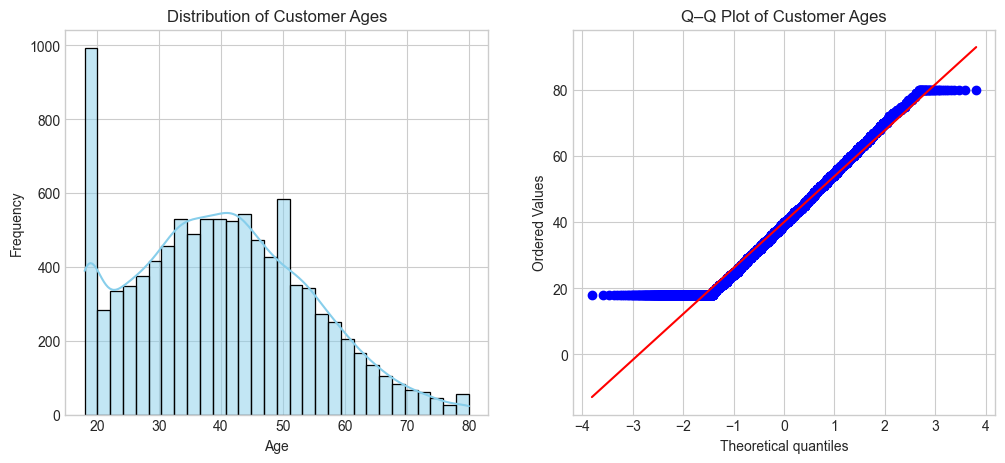

Mean: 40.0162
Median: 39.0
Skewness: 0.3209915671252623
Kurtosis: -0.4727733107690595


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Histogram with KDE
fig, axes = plt.subplots(1, 2, figsize=(12,5))
ax1=axes[0]
sns.histplot(retail_data['customer_age'], kde=True, bins=30, color='skyblue', ax=ax1)
ax1.set_title("Distribution of Customer Ages")
ax1.set_xlabel("Age")
ax1.set_ylabel("Frequency")

ax2=axes[1]
stats.probplot(retail_data['customer_age'], dist="norm", plot=ax2)
ax2.set_title("Q–Q Plot of Customer Ages")

plt.title("Q–Q Plot of Customer Ages")
plt.show()

print("Mean:", retail_data['customer_age'].mean())
print("Median:", retail_data['customer_age'].median())
print("Skewness:", retail_data['customer_age'].skew())
print("Kurtosis:", retail_data['customer_age'].kurt())

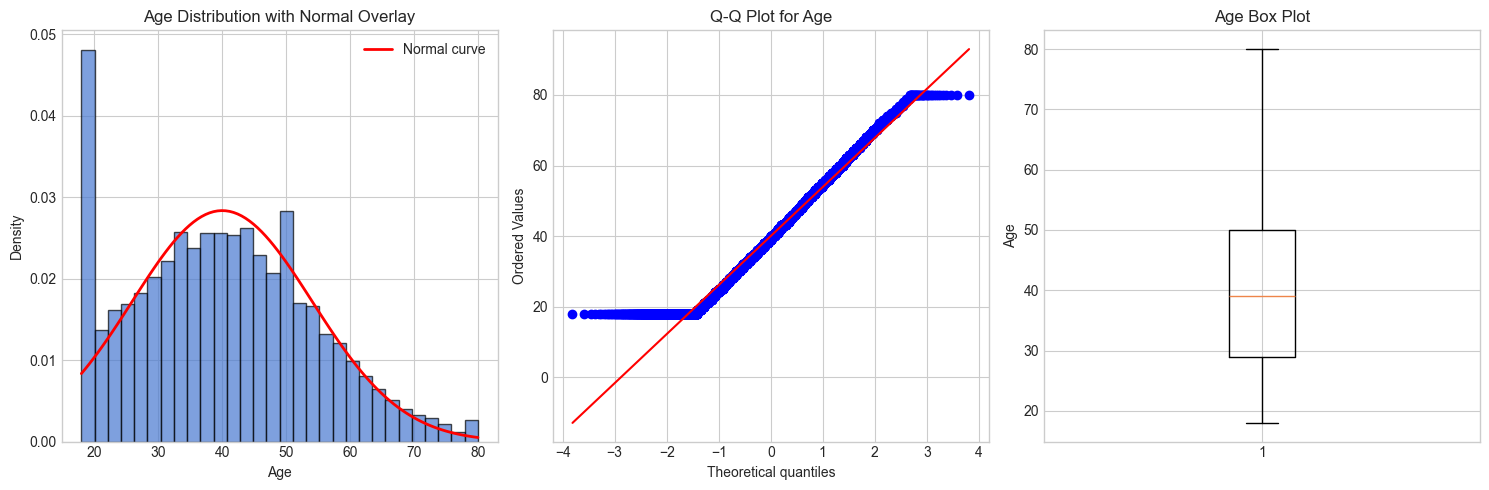

Shapiro-Wilk test statistic: 0.9757
P-value: 0.0000
Conclusion: Not normal distribution


In [5]:
# Distribution analysis for customer age
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogram with normal curve overlay
ax1 = axes[0]
n, bins, patches = ax1.hist(retail_data['customer_age'], bins=30, density=True, 
                            alpha=0.7, edgecolor='black')
mu = retail_data['customer_age'].mean()
sigma = retail_data['customer_age'].std()
x = np.linspace(retail_data['customer_age'].min(), retail_data['customer_age'].max(), 100)
ax1.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal curve')
ax1.set_title('Age Distribution with Normal Overlay')
ax1.set_xlabel('Age')
ax1.set_ylabel('Density')
ax1.legend()

# Q-Q plot
ax2 = axes[1]
stats.probplot(retail_data['customer_age'], dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot for Age')

# Box plot
ax3 = axes[2]
ax3.boxplot(retail_data['customer_age'], vert=True)
ax3.set_title('Age Box Plot')
ax3.set_ylabel('Age')

plt.tight_layout()
plt.show()

# Statistical tests
statistic, p_value = stats.shapiro(retail_data['customer_age'][:5000])
print(f"Shapiro-Wilk test statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Conclusion: {'Normal distribution' if p_value > 0.05 else 'Not normal distribution'}")

<details>
<summary><b>Solution</b></summary>

```python
# Distribution analysis for customer age
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogram with normal curve overlay
ax1 = axes[0]
n, bins, patches = ax1.hist(retail_data['customer_age'], bins=30, density=True, 
                            alpha=0.7, edgecolor='black')
mu = retail_data['customer_age'].mean()
sigma = retail_data['customer_age'].std()
x = np.linspace(retail_data['customer_age'].min(), retail_data['customer_age'].max(), 100)
ax1.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal curve')
ax1.set_title('Age Distribution with Normal Overlay')
ax1.set_xlabel('Age')
ax1.set_ylabel('Density')
ax1.legend()

# Q-Q plot
ax2 = axes[1]
stats.probplot(retail_data['customer_age'], dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot for Age')

# Box plot
ax3 = axes[2]
ax3.boxplot(retail_data['customer_age'], vert=True)
ax3.set_title('Age Box Plot')
ax3.set_ylabel('Age')

plt.tight_layout()
plt.show()

# Statistical tests
statistic, p_value = stats.shapiro(retail_data['customer_age'][:5000])
print(f"Shapiro-Wilk test statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Conclusion: {'Normal distribution' if p_value > 0.05 else 'Not normal distribution'}")
```
</details>

## 3. Correlation and Relationship Visualization

In [ ]:
# Correlation analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Select numerical columns
numerical_cols = ['total_amount', 'quantity', 'unit_price', 'customer_age', 'satisfaction_score']
corr_data = retail_data[numerical_cols]

# 1. Correlation heatmap
ax1 = axes[0, 0]
corr_matrix = corr_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, ax=ax1, vmin=-1, vmax=1)
ax1.set_title('Pearson Correlation Matrix')

# 2. Scatter plot with regression
ax2 = axes[0, 1]
sample = retail_data.sample(500)
sns.regplot(data=sample, x='quantity', y='total_amount', ax=ax2, scatter_kws={'alpha': 0.5})
ax2.set_title('Quantity vs Total Amount')
ax2.set_xlabel('Quantity')
ax2.set_ylabel('Total Amount')

# 3. Hexbin plot
ax3 = axes[0, 2]
hexbin = ax3.hexbin(retail_data['customer_age'], retail_data['total_amount'], 
                    gridsize=25, cmap='YlOrRd')
ax3.set_xlabel('Customer Age')
ax3.set_ylabel('Transaction Amount')
ax3.set_title('Age vs Amount (Hexbin)')
plt.colorbar(hexbin, ax=ax3)

# 4. Category comparison
ax4 = axes[1, 0]
category_avg = retail_data.groupby('category')[numerical_cols].mean()
category_avg_normalized = (category_avg - category_avg.min()) / (category_avg.max() - category_avg.min())
sns.heatmap(category_avg_normalized.T, annot=True, fmt='.2f', cmap='viridis', ax=ax4)
ax4.set_title('Normalized Metrics by Category')
ax4.set_xlabel('Category')

# 5. Pair plot (subset)
ax5 = axes[1, 1]
scatter_sample = retail_data[['total_amount', 'customer_age', 'satisfaction_score']].sample(300)
from pandas.plotting import scatter_matrix
scatter_matrix(scatter_sample, alpha=0.5, figsize=(6, 6), diagonal='hist', ax=ax5)
ax5.set_title('Scatter Matrix')

# 6. Bubble chart
ax6 = axes[1, 2]
bubble_data = retail_data.groupby('store_location').agg({
    'total_amount': 'mean',
    'satisfaction_score': 'mean',
    'transaction_id': 'count'
}).reset_index()

scatter = ax6.scatter(bubble_data['satisfaction_score'], 
                     bubble_data['total_amount'],
                     s=bubble_data['transaction_id']/20,
                     alpha=0.6, c=range(len(bubble_data)), cmap='viridis')
ax6.set_xlabel('Avg Satisfaction Score')
ax6.set_ylabel('Avg Transaction Amount')
ax6.set_title('Store Performance (size=volume)')
for i, txt in enumerate(bubble_data['store_location']):
    ax6.annotate(txt, (bubble_data['satisfaction_score'].iloc[i], 
                       bubble_data['total_amount'].iloc[i]))

plt.suptitle('Correlation and Relationship Analysis', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## 4. Time Series Visualization

In [ ]:
# Time series analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Prepare daily aggregated data
daily_sales = retail_data.groupby(retail_data['date'].dt.date).agg({
    'total_amount': 'sum',
    'transaction_id': 'count',
    'customer_id': 'nunique'
}).reset_index()
daily_sales.columns = ['date', 'revenue', 'transactions', 'unique_customers']

# 1. Time series with moving average
ax1 = axes[0, 0]
ax1.plot(daily_sales['date'], daily_sales['revenue'], alpha=0.3, label='Daily')
rolling_7 = daily_sales['revenue'].rolling(window=7).mean()
rolling_30 = daily_sales['revenue'].rolling(window=30).mean()
ax1.plot(daily_sales['date'], rolling_7, 'r-', linewidth=2, label='7-day MA')
ax1.plot(daily_sales['date'], rolling_30, 'g-', linewidth=2, label='30-day MA')
ax1.set_title('Daily Revenue with Moving Averages')
ax1.set_xlabel('Date')
ax1.set_ylabel('Revenue')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

# 2. Monthly aggregation
ax2 = axes[0, 1]
monthly = retail_data.groupby(retail_data['date'].dt.to_period('M'))['total_amount'].agg(['sum', 'mean', 'count'])
ax2.bar(range(len(monthly)), monthly['sum'], alpha=0.7)
ax2.set_xticks(range(len(monthly)))
ax2.set_xticklabels(monthly.index.astype(str), rotation=45)
ax2.set_title('Monthly Revenue')
ax2.set_ylabel('Total Revenue')

# 3. Day of week pattern
ax3 = axes[0, 2]
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_stats = retail_data.groupby('day_of_week')['total_amount'].agg(['mean', 'sum'])
weekday_stats = weekday_stats.reindex(day_order)
x_pos = np.arange(len(day_order))
ax3.bar(x_pos, weekday_stats['sum'], alpha=0.7)
ax3.set_xticks(x_pos)
ax3.set_xticklabels(day_order, rotation=45)
ax3.set_title('Revenue by Day of Week')
ax3.set_ylabel('Total Revenue')

# 4. Hourly pattern
ax4 = axes[1, 0]
hourly = retail_data.groupby('hour')['total_amount'].mean()
ax4.plot(hourly.index, hourly.values, 'o-', linewidth=2, markersize=8)
ax4.set_title('Average Transaction by Hour')
ax4.set_xlabel('Hour of Day')
ax4.set_ylabel('Avg Transaction Amount')
ax4.grid(True, alpha=0.3)

# 5. Heatmap calendar
ax5 = axes[1, 1]

# safer: distinguish weeks across years
iso = retail_data['date'].dt.isocalendar()
week_index = iso.year.astype(int).astype(str) + "-W" + iso.week.astype(int).astype(str).str.zfill(2)

pivot_cal = retail_data.pivot_table(
    values='total_amount',
    index=week_index,                               # 'YYYY-Www'
    columns=retail_data['date'].dt.dayofweek,       # 0=Mon ... 6=Sun
    aggfunc='sum'
).sort_index()

sns.heatmap(
    pivot_cal,
    cmap='YlOrRd',
    ax=ax5,
    cbar_kws={'label': 'Revenue'}
)
ax5.set_title('Weekly Revenue Heatmap')
ax5.set_xlabel('Day of Week')
ax5.set_ylabel('ISO Week')
ax5.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation=0)


# 6. Cumulative revenue
ax6 = axes[1, 2]
cumulative = daily_sales['revenue'].cumsum()
ax6.fill_between(range(len(cumulative)), cumulative, alpha=0.5)
ax6.plot(range(len(cumulative)), cumulative, linewidth=2)
ax6.set_title('Cumulative Revenue')
ax6.set_xlabel('Days')
ax6.set_ylabel('Cumulative Revenue')

plt.suptitle('Time Series Analysis', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

**Exercise 2 — Seasonal Pattern Detection (hard)**  
Identify and visualize any seasonal patterns in the data.


NameError: name 'daily_sales' is not defined

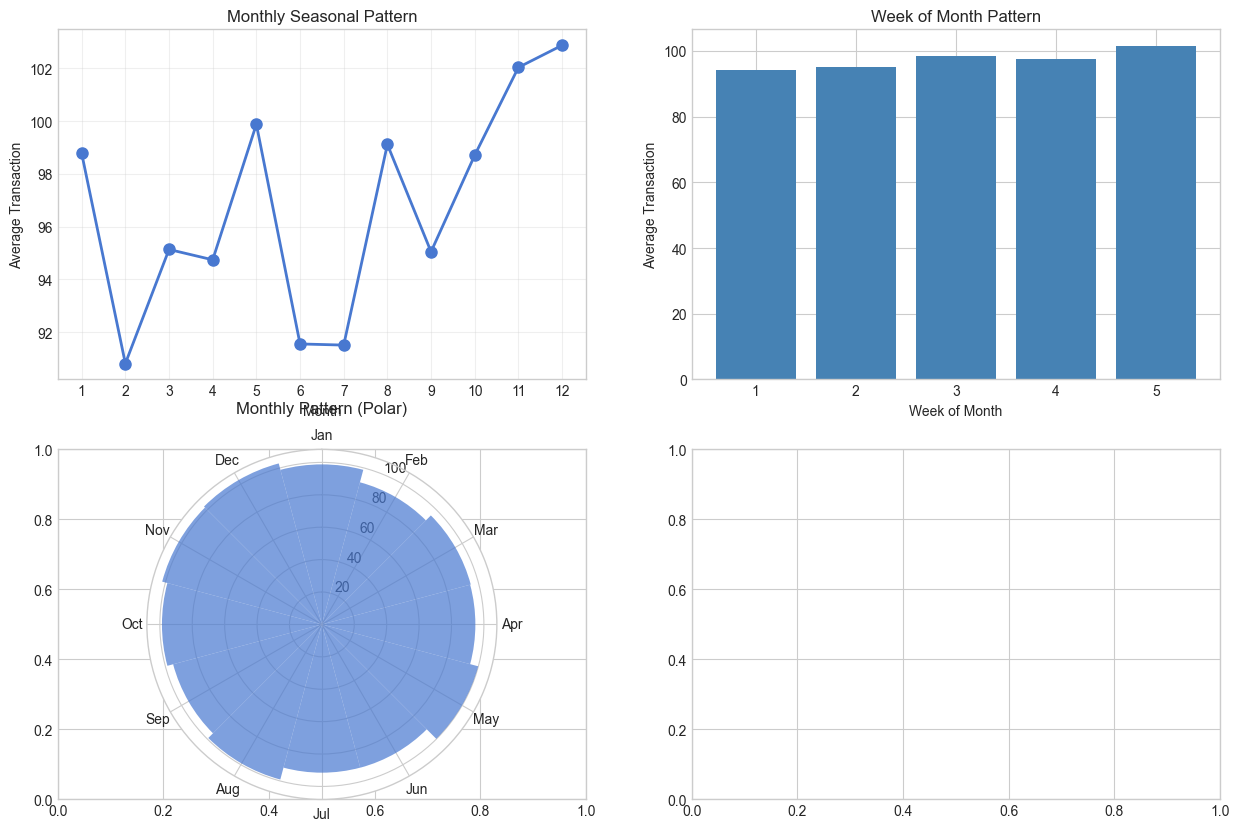

In [15]:
# Seasonal pattern analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Monthly patterns
ax1 = axes[0, 0]
monthly_avg = retail_data.groupby(retail_data['date'].dt.month)['total_amount'].mean()
ax1.plot(monthly_avg.index, monthly_avg.values, 'o-', linewidth=2, markersize=8)
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Transaction')
ax1.set_title('Monthly Seasonal Pattern')
ax1.set_xticks(range(1, 13))
ax1.grid(True, alpha=0.3)

# 2. Week of month pattern
ax2 = axes[0, 1]
retail_data['week_of_month'] = (retail_data['date'].dt.day - 1) // 7 + 1
week_pattern = retail_data.groupby('week_of_month')['total_amount'].mean()
ax2.bar(week_pattern.index, week_pattern.values, color='steelblue')
ax2.set_xlabel('Week of Month')
ax2.set_ylabel('Average Transaction')
ax2.set_title('Week of Month Pattern')

# 3. Polar plot for monthly pattern
ax3 = plt.subplot(2, 2, 3, projection='polar')
theta = np.linspace(0, 2 * np.pi, 12, endpoint=False)
radii = monthly_avg.values
width = 2 * np.pi / 12
bars = ax3.bar(theta, radii, width=width, bottom=0.0, alpha=0.7)
ax3.set_theta_zero_location('N')
ax3.set_theta_direction(-1)
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax3.set_xticks(theta)
ax3.set_xticklabels(month_labels)
ax3.set_title('Monthly Pattern (Polar)', y=1.08)

# 4. Decomposition (simplified)
ax4 = axes[1, 1]
from scipy.signal import savgol_filter
daily_ts = daily_sales['revenue'].values
trend = savgol_filter(daily_ts, window_length=31, polyorder=3)
seasonal = daily_ts - trend
ax4.plot(range(len(daily_ts)), daily_ts, alpha=0.3, label='Original')
ax4.plot(range(len(trend)), trend, 'r-', linewidth=2, label='Trend')
ax4.set_title('Trend Extraction')
ax4.set_xlabel('Days')
ax4.set_ylabel('Revenue')
ax4.legend()

plt.tight_layout()
plt.show()

print("Seasonal Insights:")
print(f"Peak month: {month_labels[monthly_avg.argmax()]}")
print(f"Lowest month: {month_labels[monthly_avg.argmin()]}")
print(f"Variation coefficient: {monthly_avg.std() / monthly_avg.mean():.2%}")


<details>
<summary><b>Solution</b></summary>

```python
# Seasonal pattern analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Monthly patterns
ax1 = axes[0, 0]
monthly_avg = retail_data.groupby(retail_data['date'].dt.month)['total_amount'].mean()
ax1.plot(monthly_avg.index, monthly_avg.values, 'o-', linewidth=2, markersize=8)
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Transaction')
ax1.set_title('Monthly Seasonal Pattern')
ax1.set_xticks(range(1, 13))
ax1.grid(True, alpha=0.3)

# 2. Week of month pattern
ax2 = axes[0, 1]
retail_data['week_of_month'] = (retail_data['date'].dt.day - 1) // 7 + 1
week_pattern = retail_data.groupby('week_of_month')['total_amount'].mean()
ax2.bar(week_pattern.index, week_pattern.values, color='steelblue')
ax2.set_xlabel('Week of Month')
ax2.set_ylabel('Average Transaction')
ax2.set_title('Week of Month Pattern')

# 3. Polar plot for monthly pattern
ax3 = plt.subplot(2, 2, 3, projection='polar')
theta = np.linspace(0, 2 * np.pi, 12, endpoint=False)
radii = monthly_avg.values
width = 2 * np.pi / 12
bars = ax3.bar(theta, radii, width=width, bottom=0.0, alpha=0.7)
ax3.set_theta_zero_location('N')
ax3.set_theta_direction(-1)
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax3.set_xticks(theta)
ax3.set_xticklabels(month_labels)
ax3.set_title('Monthly Pattern (Polar)', y=1.08)

# 4. Decomposition (simplified)
ax4 = axes[1, 1]
from scipy.signal import savgol_filter
daily_ts = daily_sales['revenue'].values
trend = savgol_filter(daily_ts, window_length=31, polyorder=3)
seasonal = daily_ts - trend
ax4.plot(range(len(daily_ts)), daily_ts, alpha=0.3, label='Original')
ax4.plot(range(len(trend)), trend, 'r-', linewidth=2, label='Trend')
ax4.set_title('Trend Extraction')
ax4.set_xlabel('Days')
ax4.set_ylabel('Revenue')
ax4.legend()

plt.tight_layout()
plt.show()

print("Seasonal Insights:")
print(f"Peak month: {month_labels[monthly_avg.argmax()]}")
print(f"Lowest month: {month_labels[monthly_avg.argmin()]}")
print(f"Variation coefficient: {monthly_avg.std() / monthly_avg.mean():.2%}")
```
</details>

## 5. Multivariate Analysis

NameError: name 'numerical_cols' is not defined

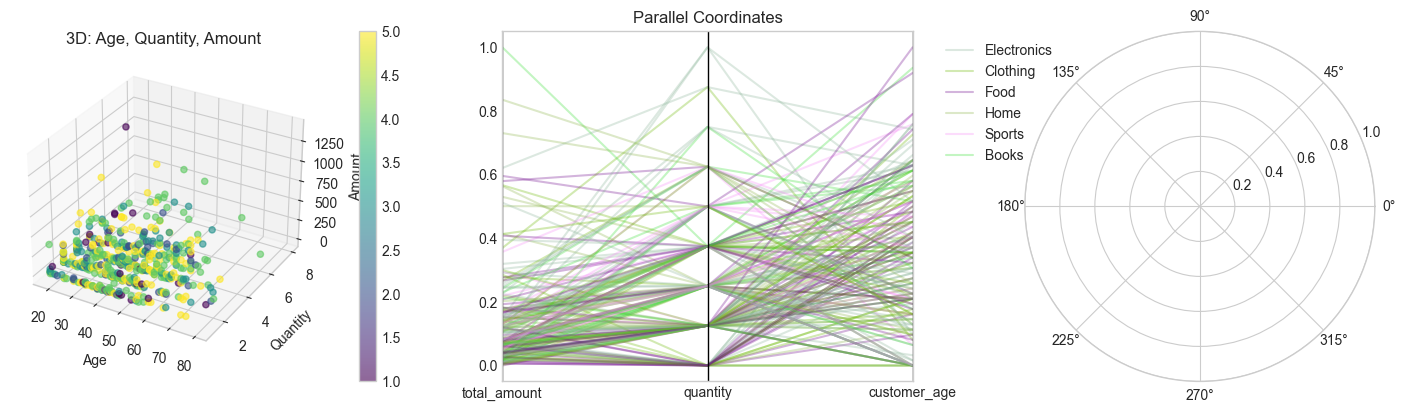

In [16]:
# Multivariate visualization
fig = plt.figure(figsize=(18, 10))

# 1. 3D scatter plot
ax1 = fig.add_subplot(2, 3, 1, projection='3d')
sample_3d = retail_data.sample(500)
scatter = ax1.scatter(sample_3d['customer_age'],
                     sample_3d['quantity'],
                     sample_3d['total_amount'],
                     c=sample_3d['satisfaction_score'],
                     cmap='viridis', alpha=0.6)
ax1.set_xlabel('Age')
ax1.set_ylabel('Quantity')
ax1.set_zlabel('Amount')
ax1.set_title('3D: Age, Quantity, Amount')
plt.colorbar(scatter, ax=ax1, pad=0.1)

# 2. Parallel coordinates
ax2 = plt.subplot(2, 3, 2)
from pandas.plotting import parallel_coordinates
parallel_sample = retail_data[['total_amount', 'quantity', 'customer_age', 'category']].sample(200)
# Normalize
for col in ['total_amount', 'quantity', 'customer_age']:
    parallel_sample[col] = (parallel_sample[col] - parallel_sample[col].min()) / \
                           (parallel_sample[col].max() - parallel_sample[col].min())
parallel_coordinates(parallel_sample, 'category', alpha=0.3, ax=ax2)
ax2.set_title('Parallel Coordinates')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 3. Radar chart
ax3 = plt.subplot(2, 3, 3, projection='polar')
categories_radar = retail_data.groupby('category')[numerical_cols].mean()
angles = np.linspace(0, 2 * np.pi, len(numerical_cols), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

for idx, (cat, values) in enumerate(categories_radar.head(3).iterrows()):
    values_norm = (values - values.min()) / (values.max() - values.min())
    values_plot = np.concatenate((values_norm, [values_norm[0]]))
    ax3.plot(angles, values_plot, 'o-', linewidth=2, label=cat)
    ax3.fill(angles, values_plot, alpha=0.25)

ax3.set_xticks(angles[:-1])
ax3.set_xticklabels(numerical_cols, size=8)
ax3.set_title('Category Profiles', y=1.08)
ax3.legend()

# 4. Contour plot
ax4 = plt.subplot(2, 3, 4)
from scipy.interpolate import griddata
points = retail_data[['customer_age', 'total_amount']].values[:1000]
values = retail_data['satisfaction_score'].values[:1000]
xi = np.linspace(18, 80, 50)
yi = np.linspace(0, 500, 50)
xi, yi = np.meshgrid(xi, yi)
zi = griddata(points, values, (xi, yi), method='linear')
contour = ax4.contourf(xi, yi, zi, levels=15, cmap='RdYlGn')
ax4.set_xlabel('Customer Age')
ax4.set_ylabel('Transaction Amount')
ax4.set_title('Satisfaction Contours')
plt.colorbar(contour, ax=ax4)

# 5. Treemap simulation
ax5 = plt.subplot(2, 3, 5)
category_revenue = retail_data.groupby('category')['total_amount'].sum().sort_values(ascending=False)
total = category_revenue.sum()
cumulative = 0
colors_tree = plt.cm.Set3(np.linspace(0, 1, len(category_revenue)))

for i, (cat, value) in enumerate(category_revenue.items()):
    width = value / total
    rect = plt.Rectangle((cumulative, 0), width, 1,
                         facecolor=colors_tree[i], edgecolor='white', linewidth=2)
    ax5.add_patch(rect)
    if width > 0.1:
        ax5.text(cumulative + width/2, 0.5, f'{cat}\n{value/total:.1%}',
                ha='center', va='center', fontsize=10)
    cumulative += width

ax5.set_xlim(0, 1)
ax5.set_ylim(0, 1)
ax5.set_title('Revenue Treemap')
ax5.axis('off')

# 6. Correlation network
ax6 = plt.subplot(2, 3, 6)
# Strong correlations only
strong_corr = corr_matrix.copy()
np.fill_diagonal(strong_corr.values, 0)
strong_corr[abs(strong_corr) < 0.3] = 0

# Draw network
n_vars = len(numerical_cols)
angles_net = np.linspace(0, 2*np.pi, n_vars, endpoint=False)
x = np.cos(angles_net)
y = np.sin(angles_net)

for i in range(n_vars):
    for j in range(i+1, n_vars):
        if strong_corr.iloc[i, j] != 0:
            color = 'red' if strong_corr.iloc[i, j] < 0 else 'blue'
            width = abs(strong_corr.iloc[i, j]) * 3
            ax6.plot([x[i], x[j]], [y[i], y[j]], color=color, 
                    alpha=0.5, linewidth=width)

ax6.scatter(x, y, s=500, c='yellow', edgecolors='black', linewidth=2, zorder=5)
for i, col in enumerate(numerical_cols):
    ax6.text(x[i]*1.2, y[i]*1.2, col, ha='center', va='center', fontsize=9)

ax6.set_xlim(-1.5, 1.5)
ax6.set_ylim(-1.5, 1.5)
ax6.set_aspect('equal')
ax6.axis('off')
ax6.set_title('Correlation Network')

plt.suptitle('Multivariate Analysis', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## 6. Mini-Challenges

Statistical Visualization Challenges:
M1 (easy): Create a violin plot comparing transaction amounts across payment methods
M2 (medium): Build a small multiples visualization showing distributions by store location
M3 (hard): Design a comprehensive dashboard with 6+ coordinated statistical views

Use the retail_data DataFrame for all challenges


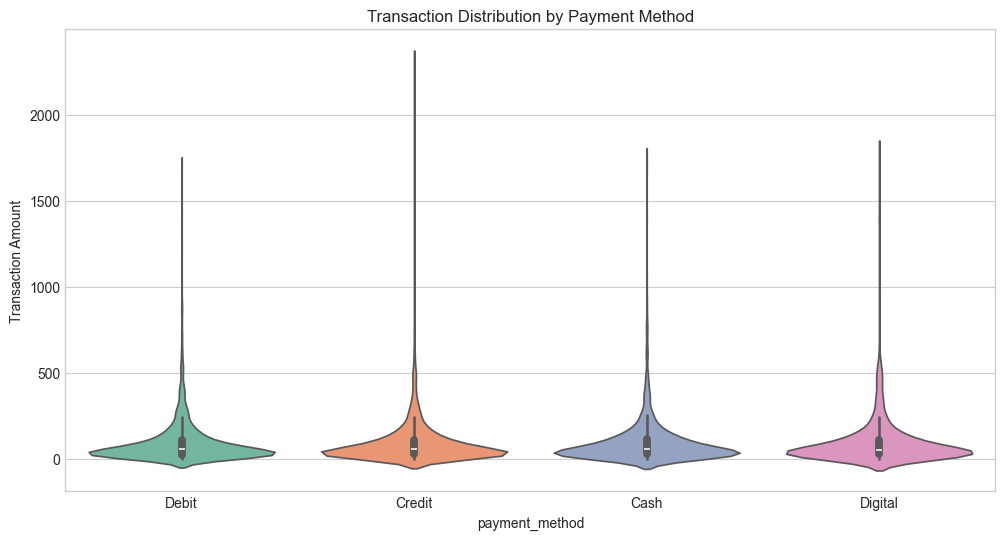

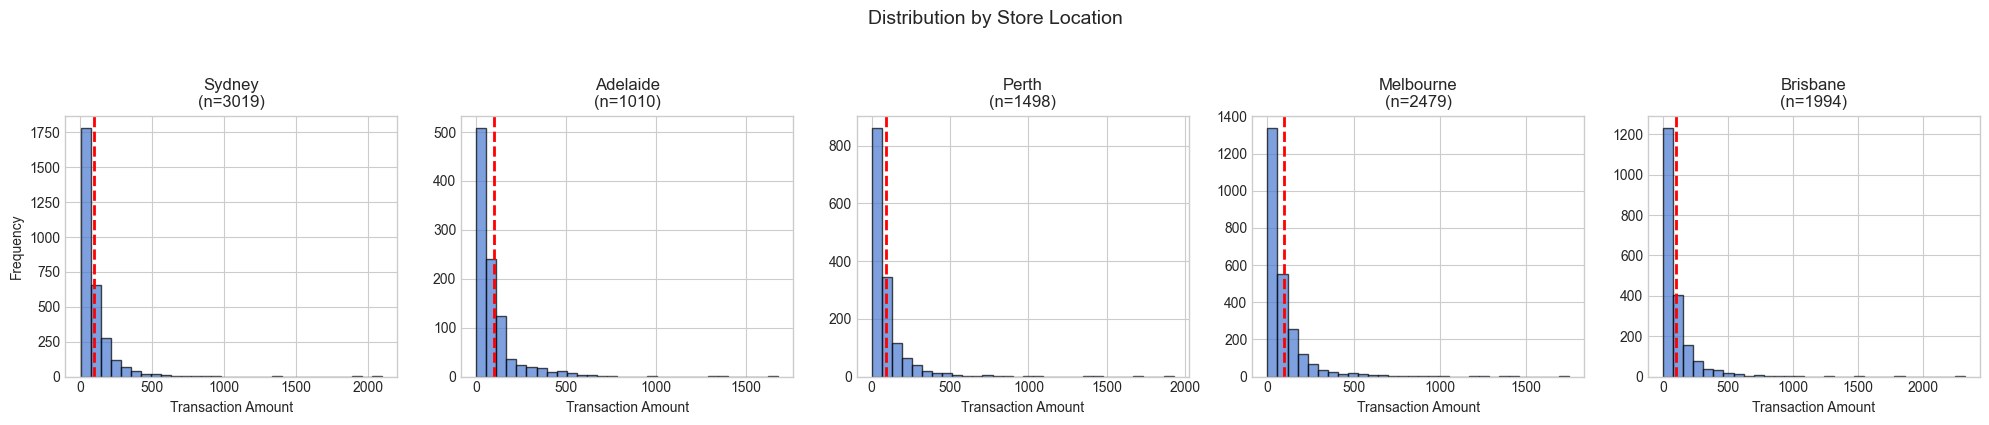

NameError: name 'corr_matrix' is not defined

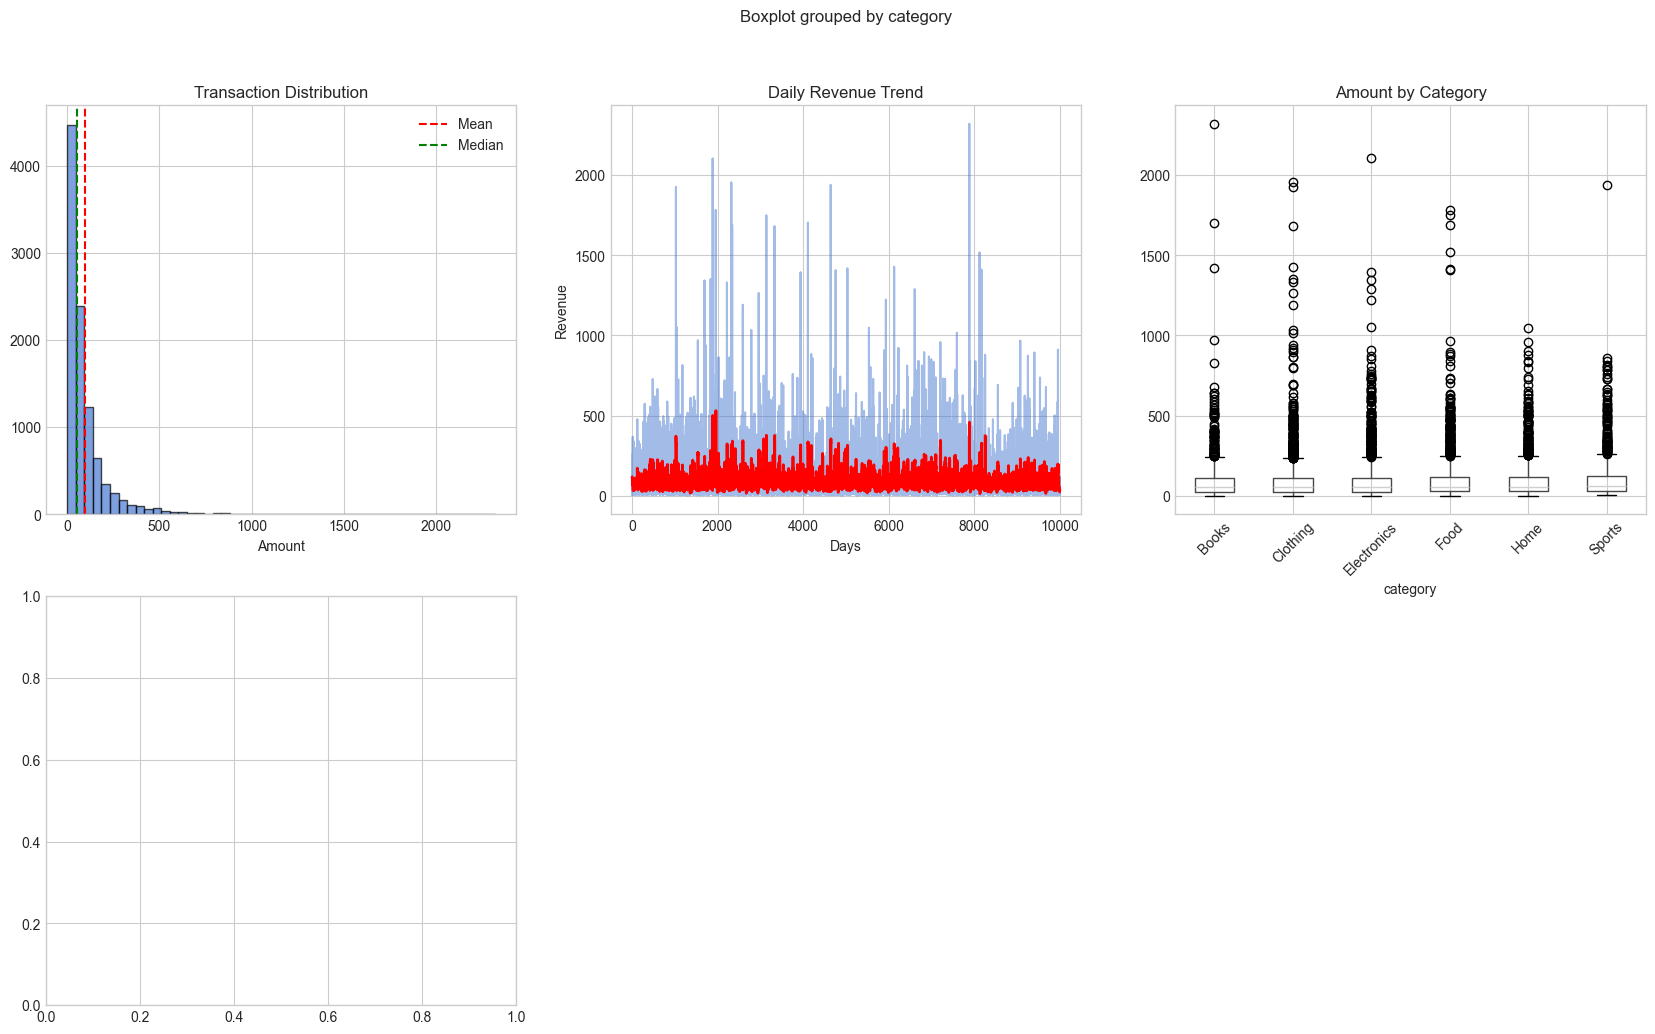

In [17]:
print("Statistical Visualization Challenges:")
print("="*50)
print("M1 (easy): Create a violin plot comparing transaction amounts across payment methods")
print("M2 (medium): Build a small multiples visualization showing distributions by store location")
print("M3 (hard): Design a comprehensive dashboard with 6+ coordinated statistical views")
print("\nUse the retail_data DataFrame for all challenges")

# M1 - Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=retail_data, x='payment_method', y='total_amount',
               inner='box', palette='Set2')
plt.title('Transaction Distribution by Payment Method')
plt.ylabel('Transaction Amount')
plt.show()

# M2 - Small multiples
locations = retail_data['store_location'].unique()
fig, axes = plt.subplots(1, len(locations), figsize=(20, 4))

for i, loc in enumerate(locations):
    loc_data = retail_data[retail_data['store_location'] == loc]['total_amount']
    axes[i].hist(loc_data, bins=30, edgecolor='black', alpha=0.7)
    axes[i].axvline(loc_data.mean(), color='red', linestyle='--', linewidth=2)
    axes[i].set_title(f'{loc}\n(n={len(loc_data)})')
    axes[i].set_xlabel('Transaction Amount')
    if i == 0:
        axes[i].set_ylabel('Frequency')

plt.suptitle('Distribution by Store Location', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

# M3 - Dashboard
fig = plt.figure(figsize=(20, 12))

# Layout: 6 panels
# 1. Distribution overview
ax1 = plt.subplot(2, 3, 1)
ax1.hist(retail_data['total_amount'], bins=50, edgecolor='black', alpha=0.7)
ax1.axvline(retail_data['total_amount'].mean(), color='red', linestyle='--', label='Mean')
ax1.axvline(retail_data['total_amount'].median(), color='green', linestyle='--', label='Median')
ax1.set_title('Transaction Distribution')
ax1.set_xlabel('Amount')
ax1.legend()

# 2. Time series
ax2 = plt.subplot(2, 3, 2)
daily_rev = retail_data.groupby(retail_data['date'].dt.date)['total_amount'].sum()
ax2.plot(range(len(daily_rev)), daily_rev.values, alpha=0.5)
ax2.plot(range(len(daily_rev)), daily_rev.rolling(7).mean().values, 'r-', linewidth=2)
ax2.set_title('Daily Revenue Trend')
ax2.set_xlabel('Days')
ax2.set_ylabel('Revenue')

# 3. Category comparison
ax3 = plt.subplot(2, 3, 3)
category_stats = retail_data.boxplot(column='total_amount', by='category', ax=ax3)
ax3.set_title('Amount by Category')
plt.sca(ax3)
plt.xticks(rotation=45)

# 4. Correlation heatmap
ax4 = plt.subplot(2, 3, 4)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=ax4)
ax4.set_title('Feature Correlations')

# 5. Customer segments
ax5 = plt.subplot(2, 3, 5)
age_satisfaction = retail_data.groupby('age_group')['satisfaction_score'].mean()
age_satisfaction.plot(kind='bar', ax=ax5, color='steelblue')
ax5.set_title('Satisfaction by Age Group')
ax5.set_xlabel('Age Group')
ax5.set_ylabel('Avg Satisfaction')
ax5.tick_params(axis='x', rotation=45)

# 6. Key metrics
ax6 = plt.subplot(2, 3, 6)
ax6.axis('off')
metrics_text = f"""
KEY METRICS
{'='*30}
Total Transactions: {len(retail_data):,}
Unique Customers: {retail_data['customer_id'].nunique():,}
Total Revenue: ${retail_data['total_amount'].sum():,.0f}
Avg Transaction: ${retail_data['total_amount'].mean():.2f}
Median Transaction: ${retail_data['total_amount'].median():.2f}

Top Category: {retail_data.groupby('category')['total_amount'].sum().idxmax()}
Top Location: {retail_data.groupby('store_location')['total_amount'].sum().idxmax()}
Peak Hour: {retail_data.groupby('hour')['total_amount'].mean().idxmax()}:00
Member Rate: {retail_data['is_member'].mean():.1%}
"""
ax6.text(0.1, 0.5, metrics_text, fontsize=11, family='monospace', va='center')

plt.suptitle('Retail Analytics Dashboard', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


<details>
<summary><b>Solutions</b></summary>

```python
# M1 - Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=retail_data, x='payment_method', y='total_amount',
               inner='box', palette='Set2')
plt.title('Transaction Distribution by Payment Method')
plt.ylabel('Transaction Amount')
plt.show()

# M2 - Small multiples
locations = retail_data['store_location'].unique()
fig, axes = plt.subplots(1, len(locations), figsize=(20, 4))

for i, loc in enumerate(locations):
    loc_data = retail_data[retail_data['store_location'] == loc]['total_amount']
    axes[i].hist(loc_data, bins=30, edgecolor='black', alpha=0.7)
    axes[i].axvline(loc_data.mean(), color='red', linestyle='--', linewidth=2)
    axes[i].set_title(f'{loc}\n(n={len(loc_data)})')
    axes[i].set_xlabel('Transaction Amount')
    if i == 0:
        axes[i].set_ylabel('Frequency')

plt.suptitle('Distribution by Store Location', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

# M3 - Dashboard
fig = plt.figure(figsize=(20, 12))

# Layout: 6 panels
# 1. Distribution overview
ax1 = plt.subplot(2, 3, 1)
ax1.hist(retail_data['total_amount'], bins=50, edgecolor='black', alpha=0.7)
ax1.axvline(retail_data['total_amount'].mean(), color='red', linestyle='--', label='Mean')
ax1.axvline(retail_data['total_amount'].median(), color='green', linestyle='--', label='Median')
ax1.set_title('Transaction Distribution')
ax1.set_xlabel('Amount')
ax1.legend()

# 2. Time series
ax2 = plt.subplot(2, 3, 2)
daily_rev = retail_data.groupby(retail_data['date'].dt.date)['total_amount'].sum()
ax2.plot(range(len(daily_rev)), daily_rev.values, alpha=0.5)
ax2.plot(range(len(daily_rev)), daily_rev.rolling(7).mean().values, 'r-', linewidth=2)
ax2.set_title('Daily Revenue Trend')
ax2.set_xlabel('Days')
ax2.set_ylabel('Revenue')

# 3. Category comparison
ax3 = plt.subplot(2, 3, 3)
category_stats = retail_data.boxplot(column='total_amount', by='category', ax=ax3)
ax3.set_title('Amount by Category')
plt.sca(ax3)
plt.xticks(rotation=45)

# 4. Correlation heatmap
ax4 = plt.subplot(2, 3, 4)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=ax4)
ax4.set_title('Feature Correlations')

# 5. Customer segments
ax5 = plt.subplot(2, 3, 5)
age_satisfaction = retail_data.groupby('age_group')['satisfaction_score'].mean()
age_satisfaction.plot(kind='bar', ax=ax5, color='steelblue')
ax5.set_title('Satisfaction by Age Group')
ax5.set_xlabel('Age Group')
ax5.set_ylabel('Avg Satisfaction')
ax5.tick_params(axis='x', rotation=45)

# 6. Key metrics
ax6 = plt.subplot(2, 3, 6)
ax6.axis('off')
metrics_text = f"""
KEY METRICS
{'='*30}
Total Transactions: {len(retail_data):,}
Unique Customers: {retail_data['customer_id'].nunique():,}
Total Revenue: ${retail_data['total_amount'].sum():,.0f}
Avg Transaction: ${retail_data['total_amount'].mean():.2f}
Median Transaction: ${retail_data['total_amount'].median():.2f}

Top Category: {retail_data.groupby('category')['total_amount'].sum().idxmax()}
Top Location: {retail_data.groupby('store_location')['total_amount'].sum().idxmax()}
Peak Hour: {retail_data.groupby('hour')['total_amount'].mean().idxmax()}:00
Member Rate: {retail_data['is_member'].mean():.1%}
"""
ax6.text(0.1, 0.5, metrics_text, fontsize=11, family='monospace', va='center')

plt.suptitle('Retail Analytics Dashboard', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()
```
</details>

## Wrap-Up
✅ You've mastered multiple distribution visualization techniques  
✅ You can analyze and visualize correlations effectively  
✅ You understand time series visualization patterns  
✅ You can create multivariate visualizations  
✅ You're ready to build interactive dashboards  

**Next:** Interactive visualizations with Plotly and building live dashboards with Streamlit!
